# Multipole interactions

## Summary

- Examples of interactions between molecules: ion-ion, ion-dipole etc.
- Basics of an electric multipole expansion
- Derive ion-fixed dipole energy
- Derive an effective potential for the ion-dipole interaction, averaging over all angles.
- Effective potentials and temperature dependence
- Math used via SymPy: series expansion; solid angle integration
- Brief illustration of dipole-dipole and ion-quadrupole derivation

## Multipoles

We will here cover the origin of multipoles such as the **monopole**, **dipole**, **quadrupole** etc. First consider a constallation of charges given by a position and a charge, ($\mathbf{r_i}^N, q_i^N$). These can for example represent approximated partial charges inside a molecule. Having access to the charge positions, we can now -- at least in principle -- calculate e.g. the electric potential some distance away from the molecule, $\mathbf{R}$:

$$
\phi(\mathbf{R}) = \sum_{i=1}^N \frac{q_i}{|\mathbf{R} - \mathbf{r}_i|} \approx  \frac{1}{R} \sum_i q_i + \frac{1}{R^2} \hat{\mathbf{R}} \cdot \sum_i q_i \mathbf{r}_i + \frac{1}{2R^3} \sum_i q_i \left[ 3(\mathbf{r}_i \cdot \hat{\mathbf{R}})^2 - r_i^2 \right] + \cdots
$$

where the right-most expression arrise from a series expansion assuming $R>>r$, i.e. for a point far away from the charge distribution. From these terms, we identify:
1. Monopole moment (total charge):
   $Q = \sum_i q_i$
2. Dipole moment:
   $\boldsymbol{\mu} = \sum_i q_i \mathbf{r}_i$
3. Quadrupole moment, ...

## Interaction types

The table below is taken from the book of Jacob Israelachvili, _Intermolecular and Surface Forces_ and shows common interaction types and how they decay with distance.
In this notebook we will derive a few of these potentials starting with the Coulomb potential.
**Israelachvili book typo**: "Keasom" should be "Keesom".

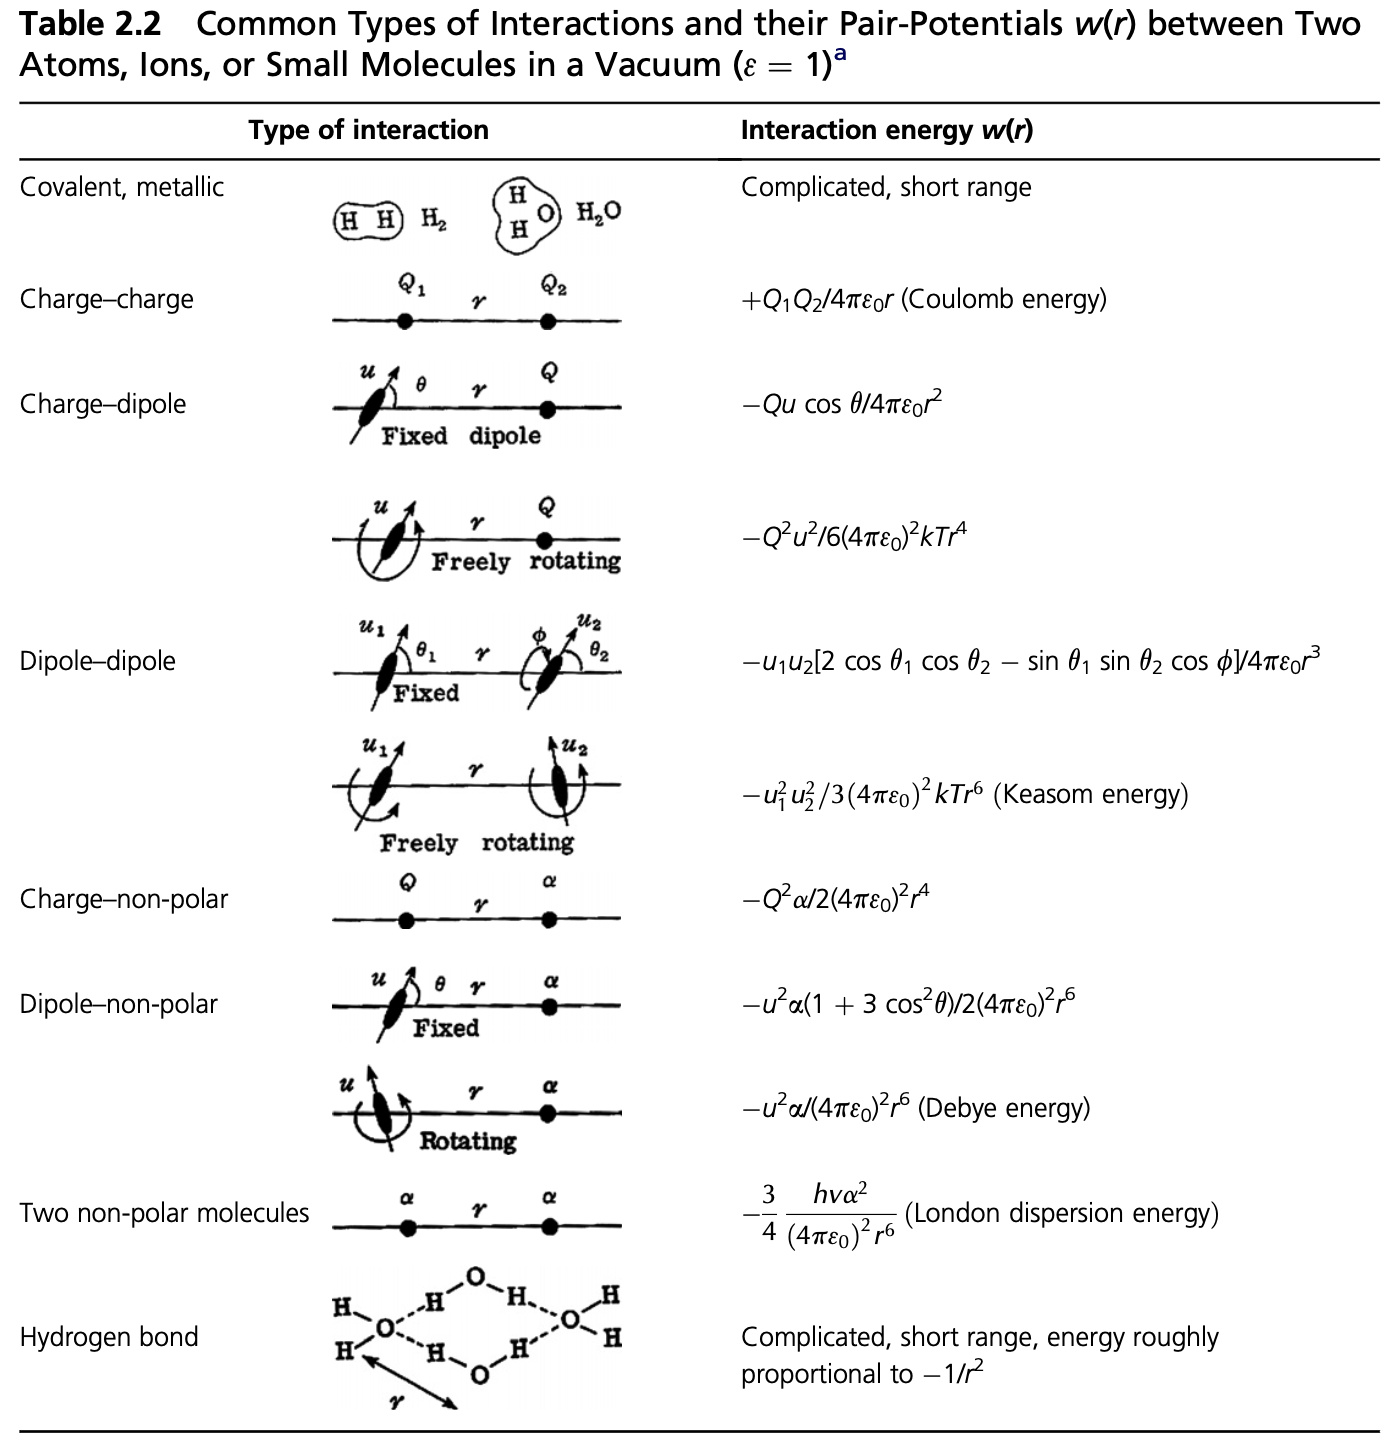

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import h, c, k
from sympy import (
    exp,
    ln,
    oo,
    sqrt,
    sin,
    cos,
    series,
    Eq,
    integrate,
    pi,
    simplify,
    symbols,
)

## Ion-ion and ion-dipole interactions

We now make a simplified multipole expansion, focusing only on deriving the ion-ion and ion-dipole interactions.

In [2]:
R = symbols("R", real=True, positive=True)
q1q2, r, theta = symbols(r"q_{1}q_{2} r theta", real=True)
u = q1q2 / sqrt(R**2 + r**2 - 2 * R * r * cos(theta))
Eq(symbols("u"), u)

Eq(u, q_{1}q_{2}/sqrt(R**2 - 2*R*r*cos(theta) + r**2))

In [3]:
u = series(u, r, n=2)
Eq(symbols("u"), u)

Eq(u, q_{1}q_{2}*r*cos(theta)/R**2 + q_{1}q_{2}/R + O(r**2))

Here we easily identify the second (leading) term as the original Coulomb potential, i.e. the _ion-ion_ interaction energy. But what about the first term?
Remembering that the _dipole moment_ is defined as $\boldsymbol{\mu} = \sum \boldsymbol{r}_i q_i$, we identify $q_2r$ as the scalar value of $\boldsymbol{\mu}_2$. We can now write an expression for the _ion-dipole_ interaction energy for a fixed angle:
$$
u_{id} = \frac{q_1 \mu_2 \cos{\theta}}{R^2}
$$
We note that the energy can both be positive (repulsive) or negative (attractive), depending on the orientation of the dipole.

## Thermal average over angles

But wait! We are not quite done. _If_ the dipole is free to rotate due to thermal motion, we can use statistical thermodynamics to write the partition function by integrating over all degrees of freedom. For this little system, the degrees of freedom is the angle, $\theta$, but we must remember that we're not integrating just a circle, but over a sphere. This brings in the additional angle, $\phi$ and the volume integration becomes:
$$
Q = \frac{\int e^{-u / k_BT} d\Omega}{\int d\Omega} =
\frac{\int_0^{2\pi} \int_0^{\pi} e^{-u/k_BT} \sin\theta d\theta d\phi}{4\pi}
$$
where $d\Omega = \sin\theta d\theta d\phi$.
It is not strictly needed, but by normalizing with the partition function when there's no interaction ($\int e^0 d\Omega = 4\pi$), the free energy, $F = -k_BT \ln Q$, goes to zero at large ion-dipole separations, $R$.


In [4]:
q1, mu2 = symbols(r"q_{1} \mu_{2}", real=True, nonzero=True)
beta, phi, kB, T = symbols(r"beta phi k_{B} T", positive=True)
u_id = q1 * mu2 * cos(theta) / R**2  # ion - fixed dipole energy
Q = integrate(exp(-beta * u_id) * sin(theta), (theta, 0, pi), (phi, 0, 2 * pi)) / (
    4 * pi
)
F = -ln(Q) / beta  # partition function -> free energy
Eq(symbols("F"), simplify(F))

Eq(F, -log(R**2*sinh(\mu_{2}*beta*q_{1}/R**2)/(\mu_{2}*beta*q_{1}))/beta)

This is an _exact_ solution and we note that we have omitted electrostatic constants. It can be simplified slightly by realizing that $q_1/R^2$ is the electric field from the point charge. It is also important to note that this expression for the ion-dipole interaction is now a _free energy_ and it incorporates degrees of freedom. For this reason it automatically becomes _temperature dependent_ through $\beta = 1/k_BT$.
$F$ is sometimes called an effective potential or _potential of mean force_, "PMF".

In the high temperature limit, $\beta \rightarrow 0$, the expression simplifies to a $1/R^4$ decay, exactly like in Israelachvili's book. It is also clear that the _thermally averaged_ ion-dipole energy is _always_ attractive.

In [5]:
Eq(symbols("F"), series(F, x=beta, x0=0, n=3))

Eq(F, -\mu_{2}**2*beta*q_{1}**2/(6*R**4) + O(beta**3))

The corresponding equation in Dill and Bromberg, 2nd Edition, is Eq. 24.7, but this lists the _energy_ and not _free energy_ and there is a factor of two between them:
$$
A = U - TS \Rightarrow U = -T^2 \frac{\partial A/T}{\partial T} \Rightarrow U = 2A
$$
It is important to note that this derivation ignore temperature dependence of the dielectric constant.

In [6]:
# Another poor-man multipole expansion giving monopole, dipole, and quadrupole
r1, r2 = symbols("r1 r2", real=True)
u = q1q2 / (R + r1 - r2)
Eq(symbols("u"), series(u, R, oo, n=4))

Eq(u, q_{1}q_{2}*(r1 - r2)**2/R**3 + q_{1}q_{2}*(-r1 + r2)/R**2 + q_{1}q_{2}/R + O(R**(-4), (R, oo)))